In [1]:
import numpy as np
import os
import mne
import pickle
from scipy.io import loadmat
import pandas as pd
#from mat73 import loadmat
import matplotlib.pyplot as plt
import osl
import yaml

In [3]:
data = np.load('/well/woolrich/projects/disp_csaky/eeg/preproc1_40hz/inner_speech_long/sub3/cond0/trial0.npy')
data.shape

(2001, 62)

In [13]:
sub_dict = {0: 10,
                         1: 7,
                         2: 3,
                         3: 11,
                         4: 8,
                         5: 4,
                         6: 12,
                         7: 9,
                         8: 5,
                         9: 13,
                         10: 1,
                         11: 14,
                         12: 2,
                         13: 6,
                         14: 0}

inv_sub_dict = {v: k for k, v in sub_dict.items()}

covs = list(range(15))

for i in range(15):
    print(covs[inv_sub_dict[i]])

14
10
12
2
5
8
13
1
4
7
0
3
6
9
11


In [3]:
# read data from neuroscan eeg with mne
path = '/well/woolrich/projects/disp_csaky/eeg/session2/rest_and_task.cdt'
raw = mne.io.read_raw_curry(path, preload=True)

Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 3068699  =      0.000 ...  3068.699 secs...
Event file found. Extracting Annotations from /well/woolrich/projects/disp_csaky/eeg/session2/rest_and_task.cdt.ceo...


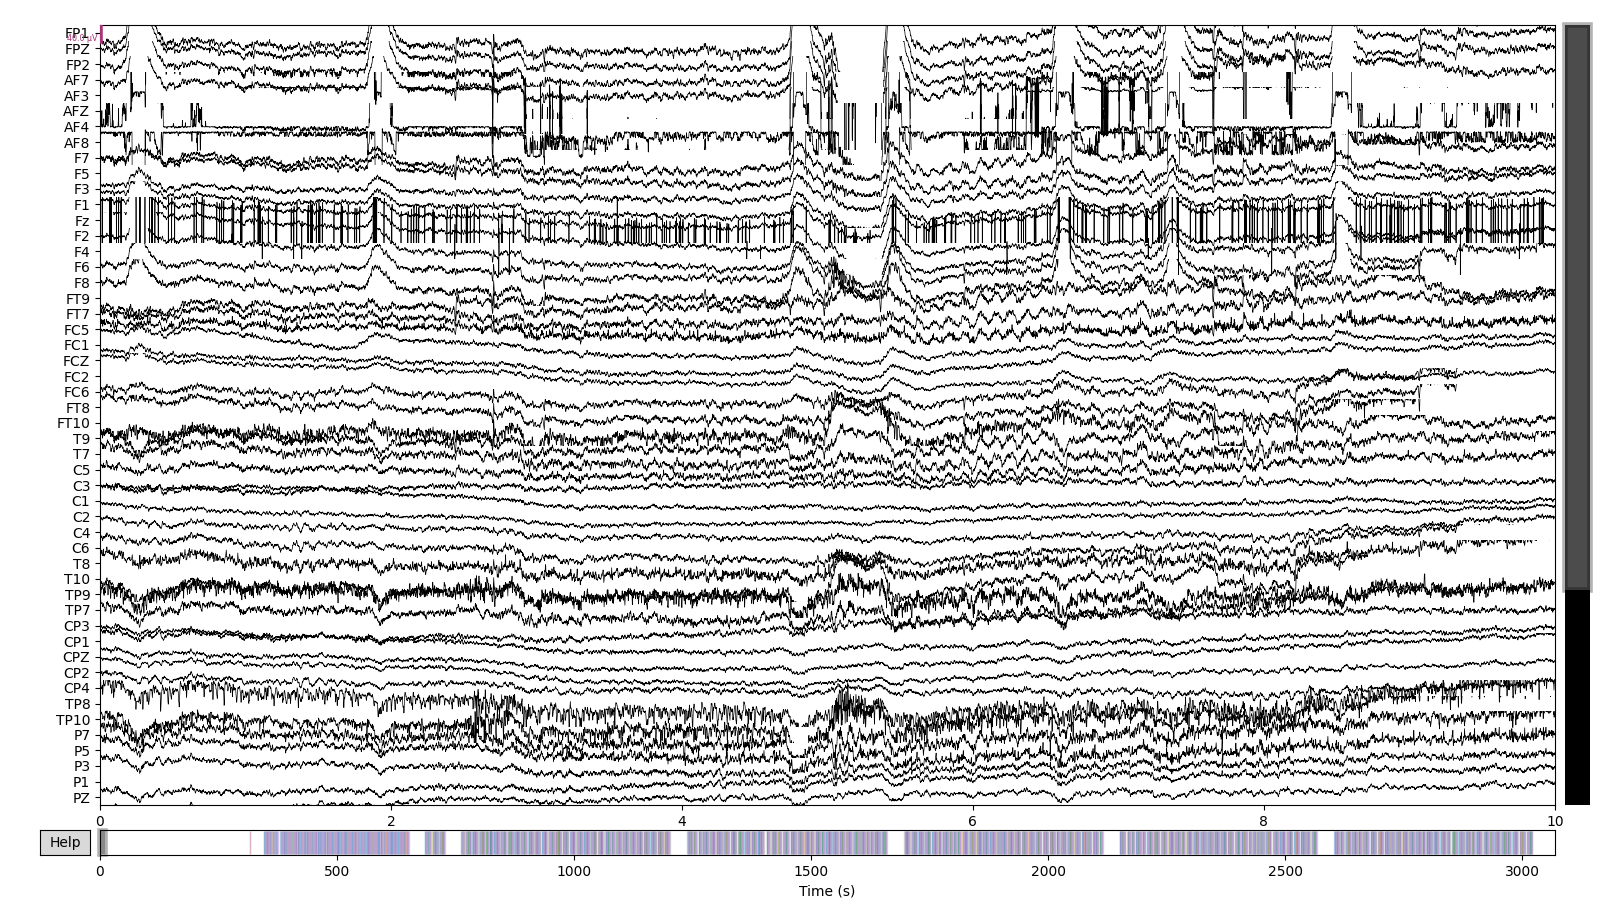

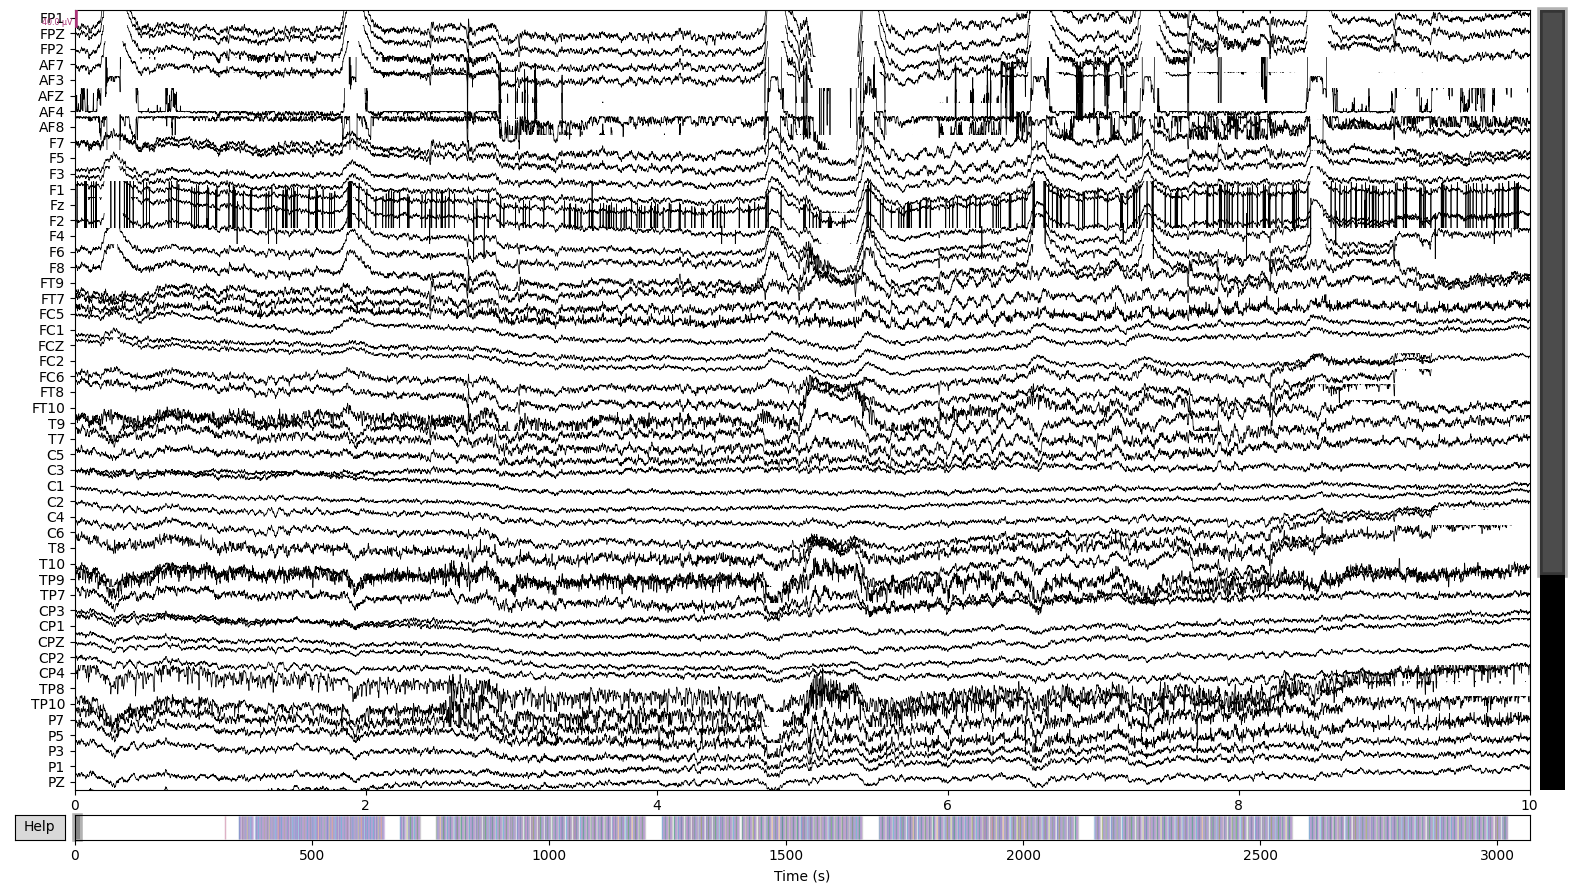

In [8]:
%matplotlib widget
raw.plot(n_channels=50)

In [5]:
events, _ = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '800000', '800001', '9']


In [6]:
events[:20]

array([[316400,      0,     14],
       [316401,      0,     15],
       [345372,      0,     10],
       [346192,      0,      1],
       [347172,      0,     13],
       [348162,      0,     13],
       [349161,      0,     13],
       [350161,      0,     13],
       [351481,      0,     11],
       [352391,      0,      1],
       [353231,      0,     13],
       [354221,      0,     13],
       [355221,      0,     13],
       [356221,      0,     13],
       [357481,      0,      7],
       [358481,      0,      1],
       [359331,      0,     13],
       [360321,      0,     13],
       [361320,      0,     13],
       [362320,      0,     13]])

Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished


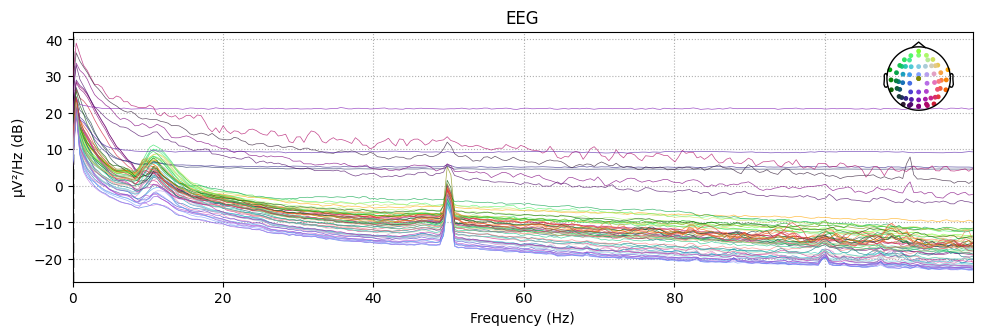

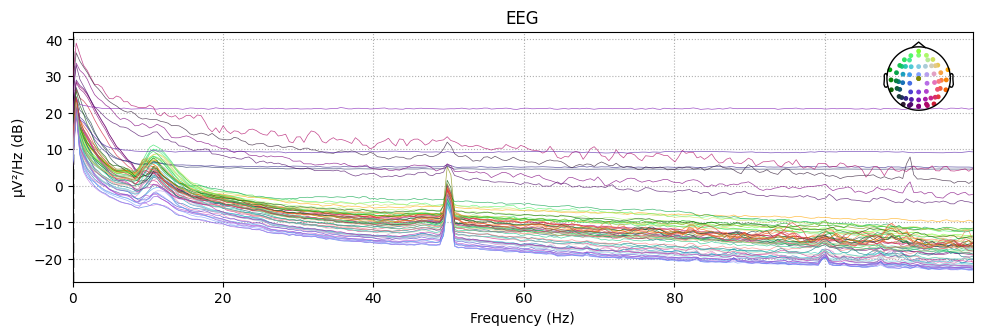

In [17]:
# plot psd of raw_fif
raw.plot_psd(fmax=120)

In [8]:
print(' '.join(raw.ch_names))

FP1 FPZ FP2 AF7 AF3 AFZ AF4 AF8 F7 F5 F3 F1 Fz F2 F4 F6 F8 FT9 FT7 FC5 FC1 FCZ FC2 FC6 FT8 FT10 T9 T7 C5 C3 C1 C2 C4 C6 T8 T10 TP9 TP7 CP3 CP1 CPZ CP2 CP4 TP8 TP10 P7 P5 P3 P1 PZ P2 P4 P6 P8 PO7 PO3 PO4 PO8 O1 OZ O2 IZ MAL MAR HEO VEO EKG EMG Trigger


In [10]:
lang_channels = ['F7', 'F5', 'F3', 'FT7', 'FC5', 'T7', 'C5', 'C3', 'TP7', 'CP3', 'P7', 'P5', 'P3']

# get indices of language channels
lang_ch_idx = [raw.ch_names.index(ch) for ch in lang_channels]
lang_ch_idx

[8, 9, 10, 18, 19, 27, 28, 29, 37, 38, 45, 46, 47]

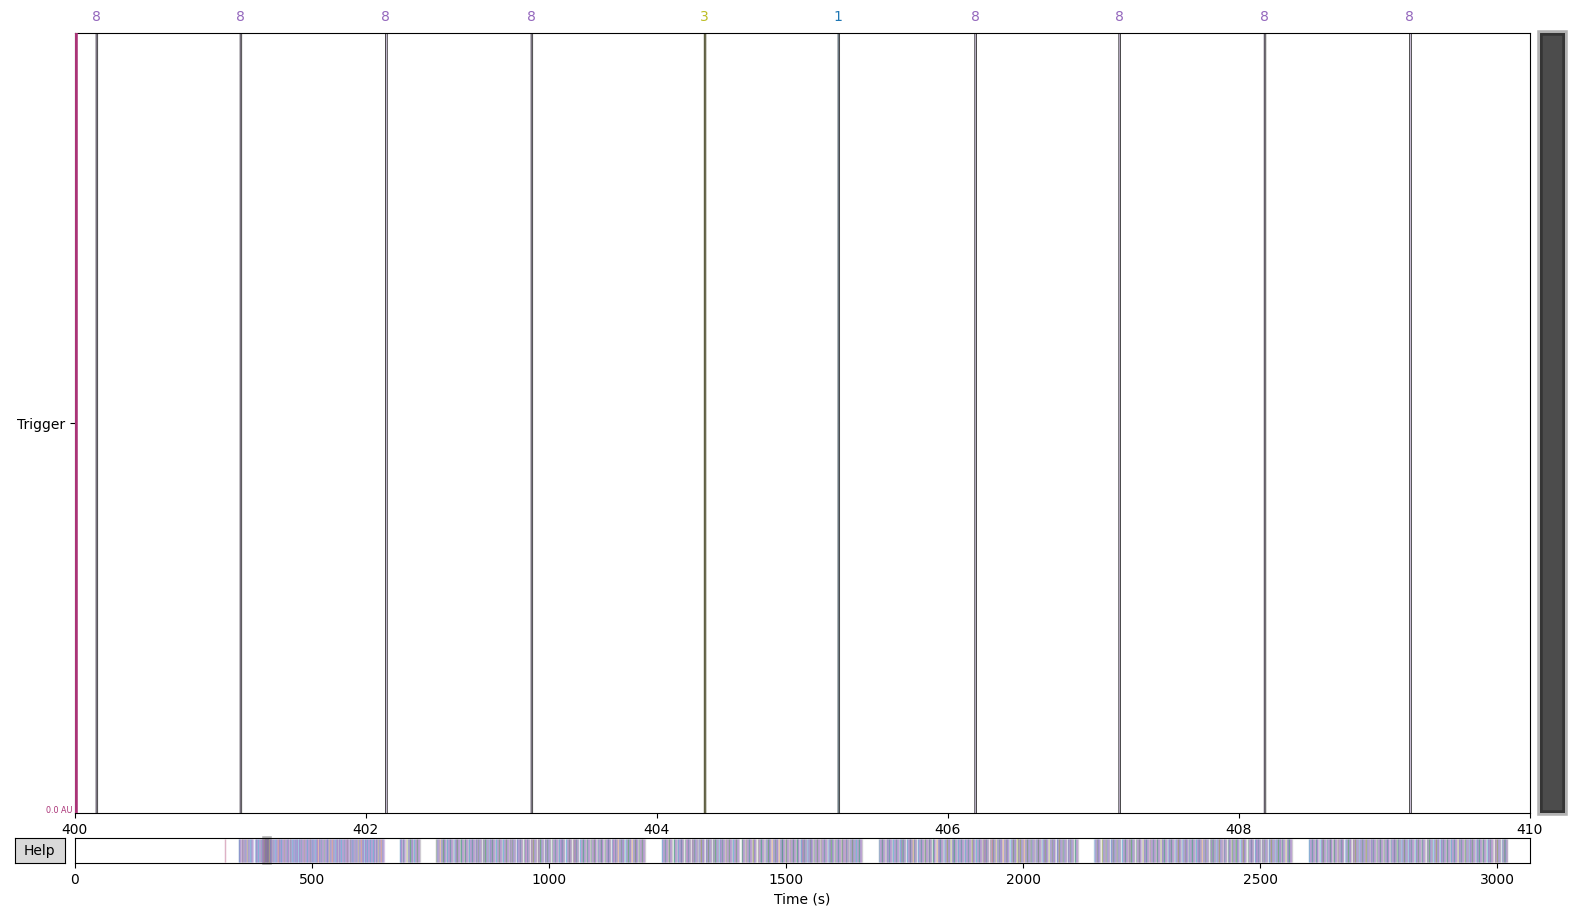

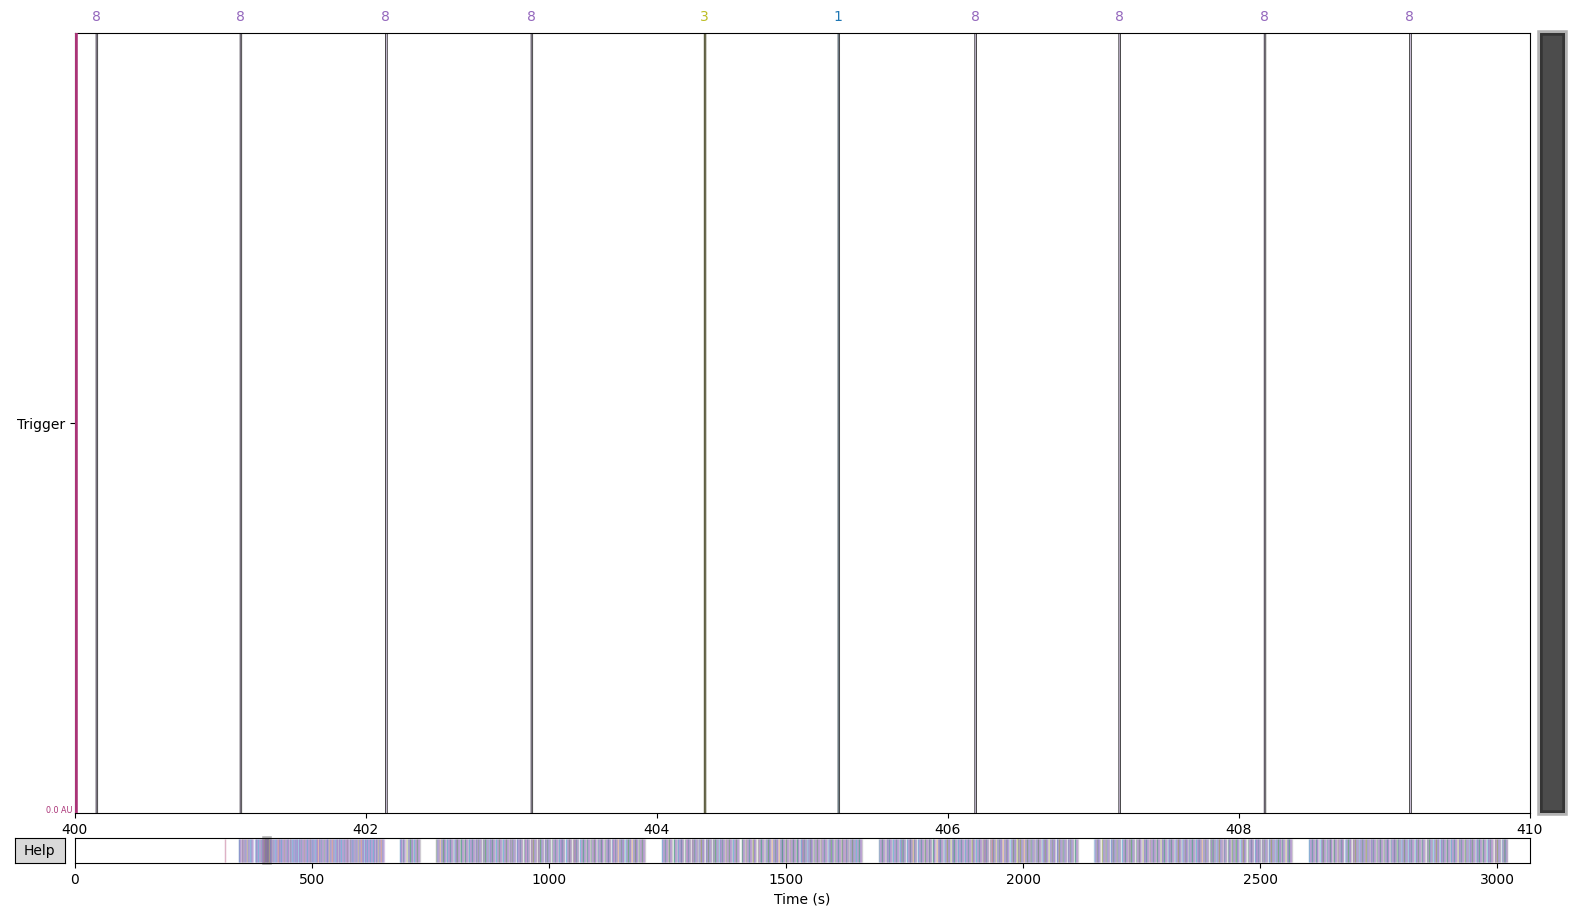

In [24]:
# plot EKG channel
raw.pick_channels(['Trigger']).plot(start=400,duration=10)

In [25]:
trig_data = raw.get_data(picks=['Trigger'])

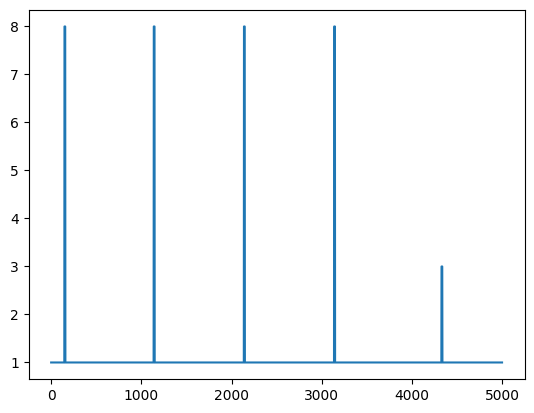

In [42]:
plt.plot(((trig_data[0, 400000:405000]-0.061440)*1e6).astype(np.int32)+1)

In [7]:
# apply this to the Trigger channel: ((x-0.061440)*1e6).astype(np.int32)+1
fun = lambda x: ((x-0.061440)*1e6).astype(np.int32)+1
raw.apply_function(fun, picks=['Trigger'])


<RawCurry | rest_and_task.cdt, 69 x 3068700 (3068.7 s), ~1.58 GB, data loaded>

In [8]:
# extract events and epoch raw data
events_trig = mne.find_events(raw, stim_channel='Trigger')

Trigger channel has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
2020 events found
Event IDs: [ 2  3  4  5  6  7  8  9 11 12 13 14 15]


In [9]:
events_trig[:20]

array([[345372,      1,      5],
       [347172,      1,      8],
       [348162,      1,      8],
       [349161,      1,      8],
       [350161,      1,      8],
       [351481,      1,      6],
       [353231,      1,      8],
       [354221,      1,      8],
       [355221,      1,      8],
       [356221,      1,      8],
       [357481,      1,      2],
       [359331,      1,      8],
       [360321,      1,      8],
       [361320,      1,      8],
       [362320,      1,      8],
       [363620,      1,      3],
       [365590,      1,      8],
       [366580,      1,      8],
       [367580,      1,      8],
       [368580,      1,      8]])

In [10]:
events[:20]

array([[316400,      0,     14],
       [316401,      0,     15],
       [345372,      0,     10],
       [346192,      0,      1],
       [347172,      0,     13],
       [348162,      0,     13],
       [349161,      0,     13],
       [350161,      0,     13],
       [351481,      0,     11],
       [352391,      0,      1],
       [353231,      0,     13],
       [354221,      0,     13],
       [355221,      0,     13],
       [356221,      0,     13],
       [357481,      0,      7],
       [358481,      0,      1],
       [359331,      0,     13],
       [360321,      0,     13],
       [361320,      0,     13],
       [362320,      0,     13]])

In [3]:
event_dict = {#'event_off':1,
              'words/hungry':2,
              'words/tired':3,
              'words/thirsty':4,
              'words/toilet':5,
              'words/pain':6,
              'think':7,
              'cue':8,
              'buttons_shown':9,
              #'error':10,
              'twords/hungry':11,
              'twords/tired':12,
              'twords/thirsty':13,
              'twords/toilet':14,
              'twords/pain':15,
             }

In [53]:
print(' '.join([str(i[2]) for i in events[:200]]))

5 8 8 8 8 6 8 8 8 8 2 8 8 8 8 3 8 8 8 8 4 8 8 8 8 5 8 8 8 8 4 8 8 8 8 2 8 8 8 8 6 8 8 8 8 3 8 8 8 8 3 8 8 8 8 2 8 8 8 8 4 8 8 8 8 6 8 8 8 8 5 8 8 8 8 6 8 8 8 8 2 8 8 8 8 3 8 8 8 8 4 8 8 8 8 5 8 8 8 8 4 8 8 8 8 2 8 8 8 8 6 8 8 8 8 5 8 8 8 8 3 8 8 8 8 5 8 8 8 8 4 8 8 8 8 6 8 8 8 8 2 8 8 8 8 3 8 8 8 8 5 8 8 8 8 3 8 8 8 8 6 8 8 8 8 4 8 8 8 8 2 8 8 8 8 4 8 8 8 8 2 8 8 8 8 6 8 8 8 8 3 8 8 8 8 5 8 8 8 8


In [54]:
epochs = mne.Epochs(
                raw,
                events,
                event_id=event_dict,
                tmin=-0.2,
                tmax=1.0,
                baseline=(None, 0),
                preload=True
            )

Not setting metadata
2020 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 2020 events and 1201 original time points ...
0 bad epochs dropped


Not setting metadata
1356 matching events found
No baseline correction applied
0 projection items activated


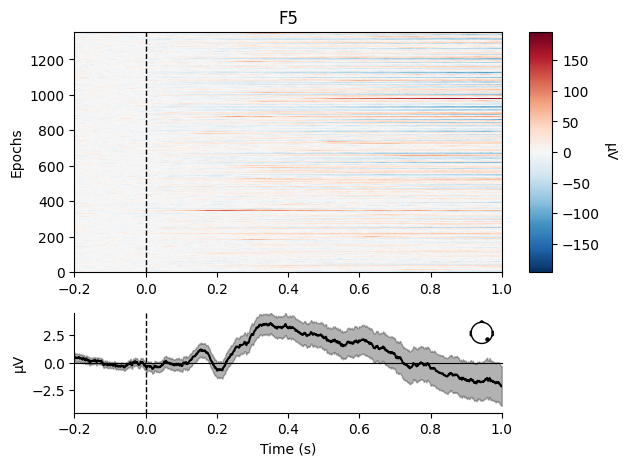

[<Figure size 640x480 with 4 Axes>]

In [62]:
epochs['cue'].plot_image(['F5'])

In [5]:
# read preprocessed dataset
path = '/well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_preproc_raw.fif'
dataset = osl.preprocessing.read_dataset(path)

Loading dataset:
Reading /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_preproc_raw.fif
Opening raw data file /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_preproc_raw.fif...
Isotrak not found
    Range : 0 ... 3068699 =      0.000 ...  3068.699 secs
Ready.
Reading /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_events.npy
Reading /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_event-id.yml
Reading /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_ica.fif
Reading /well/woolrich/projects/disp_csaky/eeg/session2/preproc1_40hz/oslpy/preproc_ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.


In [6]:
comps = dataset['ica'].get_components()

In [9]:
dataset['ica'].exclude

[0, 3]

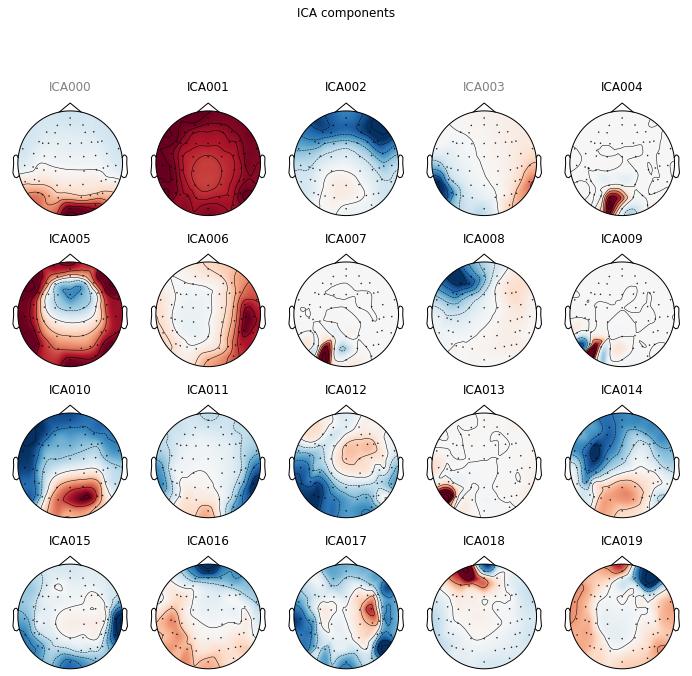

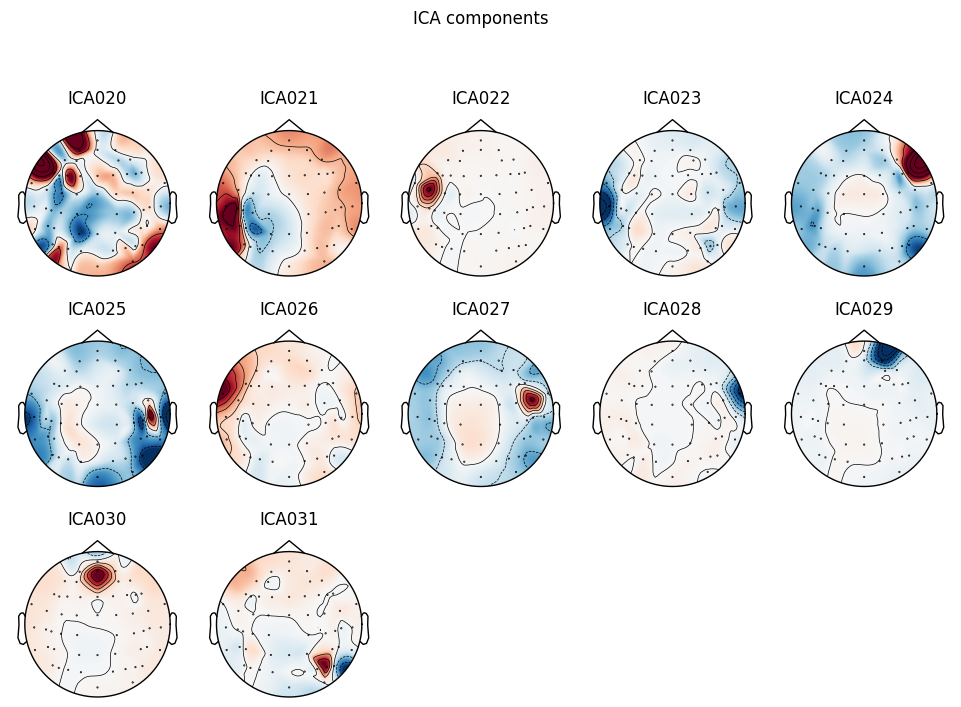

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 975x731.5 with 12 Axes>]

In [7]:
dataset['ica'].plot_components()

In [10]:
path = "/gpfs2/well/woolrich/projects/disp_csaky/eeg/session3/preproc1_40hz/cond0/trial10.npy"
trial = np.load(path)

In [11]:
trial.shape

(62, 2001)

In [18]:
path = "/gpfs2/well/woolrich/projects/disp_csaky/eeg_sub/session3/preproc1_40hz/nowhiten200sr_randcv0/cch0.mat"
trial = loadmat(path)

In [21]:
trial['x_test_t'].shape

(10, 1, 13)

## Baseline correction analyse

In [20]:
path = '/gpfs2/well/woolrich/projects/disp_csaky/eeg_sub/session3/preproc1_40hz/inner_speech_bc1s'

# load trials from 5 cond folders
trials = []
for cond in range(5):
    # find all trials in cond folder
    cond_path = os.path.join(path, 'cond'+str(cond))
    trial_paths = [os.path.join(cond_path, i) for i in os.listdir(cond_path) if i.endswith('.npy')]
    for trial in trial_paths:
        trials.append(np.load(trial))

trials = np.array(trials)

In [21]:
trials.shape

(1178, 2101, 62)

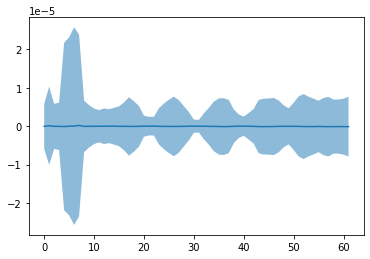

In [22]:
# compute mean and std over trials
trials_mean = np.mean(trials[:, 1000:, :], axis=(0, 1))
trials_std = np.std(trials[:, 1000:, :], axis=(0, 1))

# plot mean and std
plt.plot(trials_mean)
plt.fill_between(np.arange(trials_mean.shape[0]), trials_mean-trials_std, trials_mean+trials_std, alpha=0.5)

In [23]:
trials_mean

array([-5.76198715e-08,  9.91290534e-08, -5.23375157e-08, -5.85025894e-08,
       -1.06083107e-07, -2.56286317e-08,  1.72905672e-08,  1.95759696e-07,
       -6.13015274e-08, -4.95188175e-08, -3.03119734e-08, -2.68679266e-08,
       -2.18615845e-08, -1.15597567e-08, -1.49338923e-08, -4.25136442e-08,
       -4.85372311e-08, -7.29634948e-08, -7.29495184e-08, -4.09497396e-08,
       -1.77643908e-08,  3.02900927e-09, -1.25846861e-10, -4.33100986e-08,
       -6.47521361e-08, -7.35466656e-08, -7.79348142e-08, -7.35445198e-08,
       -4.89685839e-08, -2.80347727e-08, -8.77135786e-09, -1.05799778e-08,
       -2.39918982e-08, -5.26559276e-08, -6.77174157e-08, -8.86034215e-08,
       -1.20977774e-07, -9.46527194e-08, -4.94622157e-08, -7.44094253e-09,
       -2.49938008e-08, -3.39285506e-08, -4.66969894e-08, -1.17523705e-07,
       -1.27330253e-07, -1.16366863e-07, -9.40683620e-08, -6.10655135e-08,
       -4.49750743e-08, -4.55566322e-08, -4.76836384e-08, -6.61243291e-08,
       -1.04511841e-07, -

In [19]:
trials_mean

array([ 4.8646046e-07,  6.4936535e-07,  4.8665174e-07,  5.4039083e-07,
        1.3433259e-07,  3.3123706e-07, -3.8573012e-07,  3.3804889e-07,
        6.0305467e-07,  4.7422711e-07,  3.8545156e-07,  2.9899593e-07,
        2.7262652e-07,  3.0111022e-07,  3.9863426e-07,  5.3469103e-07,
        6.7903471e-07,  7.3421580e-07,  6.2864791e-07,  4.9823160e-07,
        1.9098869e-07,  4.8176375e-08,  1.5488919e-07,  5.5206158e-07,
        6.9098769e-07,  7.2472722e-07,  7.5691042e-07,  7.9493407e-07,
        6.2996548e-07,  4.1644859e-07,  1.7631766e-07,  1.2579925e-07,
        4.1700537e-07,  6.6944307e-07,  8.3047723e-07,  7.1216544e-07,
        9.9267970e-07,  1.0200547e-06,  5.8940429e-07,  2.9025617e-07,
       -3.3525545e-08,  2.2506194e-07,  5.8448842e-07,  1.0031054e-06,
        1.0145983e-06,  1.2166673e-06,  1.3174479e-06,  9.3968237e-07,
        4.4361960e-07,  1.0881133e-07,  3.9037010e-07,  9.5047704e-07,
        1.4916309e-06,  1.3871098e-06,  1.2229314e-06,  1.0139514e-06,
      